In [152]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [4]:
df = pd.read_excel(r'C:\Users\sarah\OneDrive\Documents\EMM Nano\Year 2\Optics\trajectories.xlsx', "Sheet3")


In [136]:
print(df)

         n  trajectory  frame         x         y  z
0        1           1      0  1208.150     8.898  0
1        2           1      1  1209.093     8.853  0
2        3           1      2  1207.741     8.427  0
3        4           1      3  1207.978     3.420  0
4        5           1      4  1207.895     1.805  0
...    ...         ...    ...       ...       ... ..
8342  8343        1114      9   902.560  2502.476  0
8343  8344        1115      8     8.549  2721.354  0
8344  8345        1115      9     6.916  2716.872  0
8345  8346        1116      8  1634.597  2857.547  0
8346  8347        1116      9  1624.806  2856.102  0

[8347 rows x 6 columns]


In [137]:
df_array = df.values

In [138]:
frame = df.values[:,2]
trajectory = df.values[:,1]
xval = df.values[:,3]
yval = df.values[:,4]

In [139]:
size = 0
for i in range(len(trajectory)-1):
    if trajectory[i+1] == trajectory[i]:
        size = size + 1

xdisp = np.zeros(size)
ydisp = np.zeros(size)

In [122]:
n = 0
for i in range(len(trajectory)-1):
    if trajectory[i+1] == trajectory[i]:
        xdisp[n] = xval[i+1]-xval[i]
        ydisp[n] = yval[i+1]-yval[i]
        n = n + 1
        

In [123]:
totaldisp = np.zeros(size)
velocity = np.zeros(size)
for i in range(size):
    totaldisp[i] = math.sqrt((xdisp[i])**2 + (ydisp[i])**2)
    velocity[i] = (totaldisp[i])/120 #units are pixels/second i think

In [148]:
size = 0
for i in range(len(trajectory)-1):
    if trajectory[i+1] != trajectory[i]:
        size = size + 1  

In [149]:
avgvelocity = np.zeros(size)

In [150]:
x = 0
y = 0
count = 0
tempsum = 0
for i in range(len(trajectory)-1):
    if trajectory[i+1] == trajectory[i]:
        tempsum = tempsum + velocity[x]
        count = count + 1
        x = x + 1
    else:
        avgvelocity[y] = tempsum/count
        count = 0
        tempsum = 0
        y = y + 1

In [151]:
avgvelocity #average velocity of each trajectory

array([0.01656851, 0.02369754, 0.00378175, ..., 0.05481069, 0.0656915 ,
       0.03975185])

(array([395., 213., 165., 145., 110.,  31.,  14.,   7.,  13.,  22.]),
 array([0.00047794, 0.01702571, 0.03357348, 0.05012126, 0.06666903,
        0.0832168 , 0.09976457, 0.11631234, 0.13286012, 0.14940789,
        0.16595566]),
 <BarContainer object of 10 artists>)

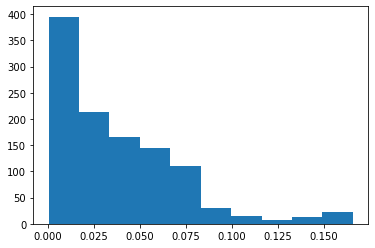

In [155]:
plt.hist(avgvelocity)